In [5]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
plt.style.use('paper.mplstyle')

In [6]:
p_adj = np.loadtxt('../csvs/external/obertas_pratio.txt')
t_exit = np.loadtxt('../csvs/external/obertas_t_exit.txt')

t_exit_rolling = pd.DataFrame(t_exit)
t_exit_rolling = t_exit_rolling.rolling(10).median()
t_exit_rolling = t_exit_rolling.values.flatten()

In [7]:
from  scipy.stats import norm
stdrice = 0.22
stdhussain = 0.43
timesRice = norm(0, stdrice).rvs(p_adj.shape[0])
timesHussain = norm(0, stdhussain).rvs(p_adj.shape[0])

nbody = np.log10(t_exit)-np.log10(t_exit_rolling)
nbody = nbody[:16000] # so we only take periods out to ~1.21 and avoid the zeros when they hit max instability time

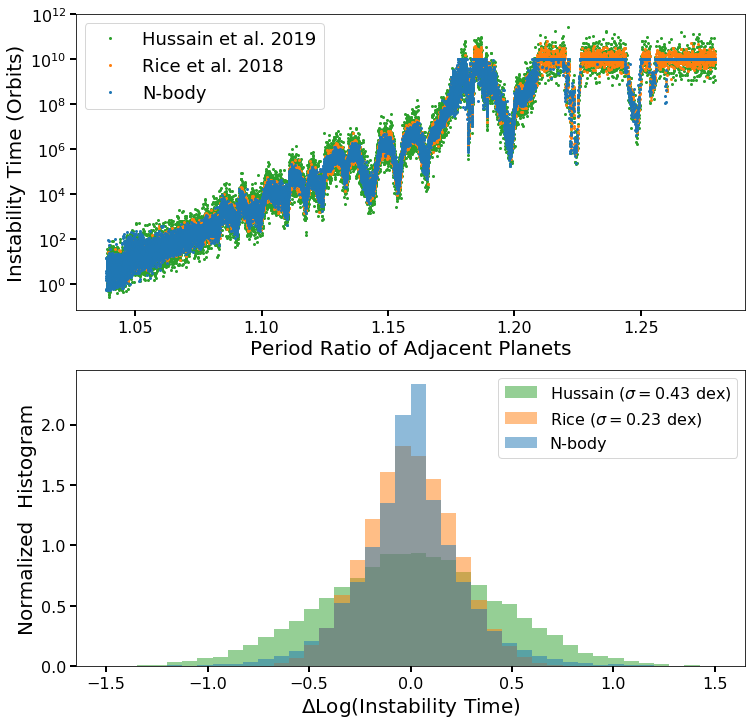

In [8]:
fig, axarr = plt.subplots(nrows=2, ncols=1, figsize=(12,12))
cmap = plt.get_cmap("tab10")

alpha=1
ax = axarr[0]
ax.plot(p_adj, np.power(10, np.log10(t_exit_rolling)+timesHussain), '.', c=cmap(2), label = 'Hussain et al. 2019', markersize=4, alpha=alpha)
ax.plot(p_adj, np.power(10, np.log10(t_exit_rolling)+timesRice), '.', c=cmap(1), label = 'Rice et al. 2018', markersize=4, alpha=alpha)
ax.plot(p_adj, t_exit, '.', label = 'N-body', c=cmap(0),markersize=4, alpha=alpha)

ax.set_yscale('log')

ax.set_xlabel("Period Ratio of Adjacent Planets")
ax.set_ylabel("Instability Time (Orbits)")

ax.legend(fontsize=18)

ax1 = axarr[1]
bins = np.linspace(-1.5,1.5,41)
ax1.hist(timesHussain, density = 1, fc=cmap(2), alpha = 0.5, bins = bins, label=r'Hussain ($\sigma = 0.43$ dex)')
ax1.hist(timesRice, density = 1, fc=cmap(1), alpha = 0.5, bins = bins, label='Rice ($\sigma = 0.23$ dex)')
ax1.hist(nbody, density = 1, fc=cmap(0), alpha = 0.5, bins = bins, label='N-body')
ax1.legend()
ax1.set_xlabel('$\Delta$Log(Instability Time)')
ax1.set_ylabel('Normalized  Histogram')
fig.savefig('fig5.pdf', bbox_inches='tight', rasterize=True)